In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Creating dataset
X, y = datasets.make_classification(n_samples=1000, 
                                    n_features=10, n_informative=8, 
                                    n_classes = 2, n_clusters_per_class=2)

## Splitting Criteria

### Accuracy

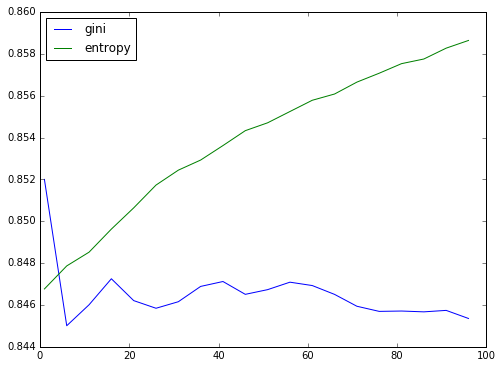

In [37]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["gini"] = []
results["entropy"] = []

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(accuracy_score(y[test_index], tree.predict(X[test_index])))
        results[criteria].append(np.average(accuracies))
    
plt.figure(figsize=(8,6))
plt.plot(costs, results["gini"], label="gini")
plt.plot(costs, results["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()

### Precision

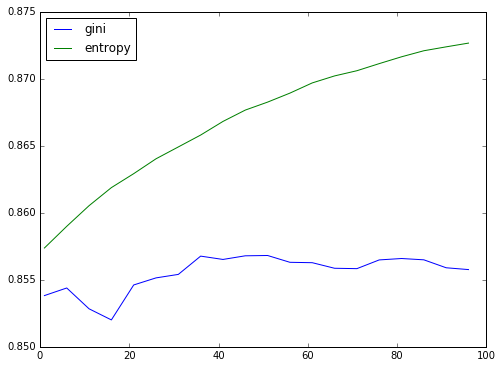

In [38]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["gini"] = []
results["entropy"] = []

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(precision_score(y[test_index], tree.predict(X[test_index])))
        results[criteria].append(np.average(accuracies))
        
plt.figure(figsize=(8,6))
plt.plot(costs, results["gini"], label="gini")
plt.plot(costs, results["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()

### Recall

In [34]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["gini"] = []
results["entropy"] = []

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(recall_score(y[test_index], tree.predict(X[test_index])))
        results[criteria].append(np.average(accuracies))
        
plt.figure(figsize=(8,6))
plt.plot(costs, results["gini"], label="gini")
plt.plot(costs, results["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()    

It seems **entropy** criterion obtains better results

## Max depth